In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:

# --- 1. Data Paths ---
base_dir = '/Users/sreehari/PycharmProjects/FInal_Project/datasets/Chest'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:

# --- 2. Class Imbalance Handling ---
img_width, img_height = 128, 128 

train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator_no_aug.classes),
    y=train_generator_no_aug.classes
)
class_weight_dict = dict(enumerate(class_weights))

Found 21715 images belonging to 3 classes.


In [5]:

# --- 3. Data Preprocessing and Augmentation --- 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 21715 images belonging to 3 classes.
Found 5417 images belonging to 3 classes.
Found 6566 images belonging to 3 classes.


In [ ]:

# --- 4. Custom CNN Model --- 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001),
input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [6]:

# --- 5. Compile and Train ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Metal device set to: Apple M1


2024-05-12 02:25:05.085109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-12 02:25:05.085365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2024-05-12 02:25:05.652575: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-12 02:25:05.917103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


679/679 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.6135

2024-05-12 02:26:10.341543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


679/679 [==============================] - 72s 103ms/step - loss: 0.9025 - accuracy: 0.6135 - val_loss: 0.6985 - val_accuracy: 0.7233
Epoch 2/20
679/679 [==============================] - 100s 148ms/step - loss: 0.7311 - accuracy: 0.7090 - val_loss: 0.5985 - val_accuracy: 0.7759
Epoch 3/20
679/679 [==============================] - 123s 181ms/step - loss: 0.6737 - accuracy: 0.7315 - val_loss: 0.5480 - val_accuracy: 0.8056
Epoch 4/20
679/679 [==============================] - 141s 207ms/step - loss: 0.6276 - accuracy: 0.7516 - val_loss: 0.5306 - val_accuracy: 0.7960
Epoch 5/20
679/679 [==============================] - 145s 214ms/step - loss: 0.6019 - accuracy: 0.7688 - val_loss: 0.5143 - val_accuracy: 0.8141
Epoch 6/20
679/679 [==============================] - 160s 236ms/step - loss: 0.5811 - accuracy: 0.7779 - val_loss: 0.4853 - val_accuracy: 0.8279
Epoch 7/20
679/679 [==============================] - 179s 264ms/step - loss: 0.5517 - accuracy: 0.7913 - val_loss: 0.4478 - val_accurac

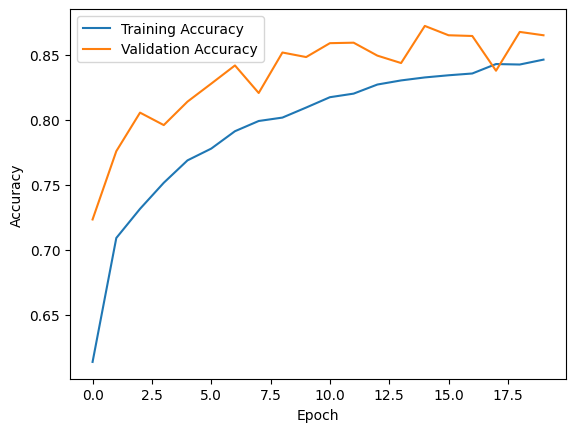

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:

# --- 6. Evaluate the Model ---
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

206/206 [==============================] - 13s 62ms/step - loss: 0.3555 - accuracy: 0.8873
Test accuracy: 0.8872982263565063


In [9]:

# --- 7. Save the Model ---
model.save('chest_model.h5')